![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/more-reviews/feedbacks.csv
/kaggle/input/more-test-feedbacks/feedbackz.csv
/kaggle/input/kaggle-test-restaurants-reviews/kaggle_rests.csv
/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv
/kaggle/input/morereviews/kaggle_task_feedbacks_1.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

more_reviews = '/kaggle/input/more-reviews/'
kaggle_restaurants = '/kaggle/input/more-test-feedbacks/'
feeds = pd.read_csv(more_reviews+'feedbacks.csv')
kaggle_rests = pd.read_csv(kaggle_restaurants+'feedbackz.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample_kaggle'] = 1 # помечаем где у нас трейн
df_test['sample_kaggle'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample_kaggle        50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample_kaggle,Rating
8809,id_8809,Paris,"['French', 'European']",6391.0,$$ - $$$,19.0,"[['Good quality sandwich', 'Very good quality ...",/Restaurant_Review-g187147-d8050994-Reviews-Ch...,d8050994,0,0.0
49100,id_1845,Munich,NaN,1860.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187309-d10031271-Reviews-E...,d10031271,1,4.5
39476,id_2300,Amsterdam,"['Asian', 'Indonesian']",2306.0,$$ - $$$,20.0,"[['Wonderful Indonesian food, lovely service.'...",/Restaurant_Review-g188590-d1133896-Reviews-Ta...,d1133896,1,4.5
39665,id_1202,Barcelona,"['International', 'Mediterranean', 'Spanish', ...",1203.0,$$$$,133.0,"[['Nice restaurant in a beautiful hotel', 'Qua...",/Restaurant_Review-g187497-d7108839-Reviews-El...,d7108839,1,4.5
48356,id_153,Vienna,"['Austrian', 'European', 'Central European', '...",154.0,$$ - $$$,89.0,"[['Nice place!', 'Cosy Night'], ['11/30/2017',...",/Restaurant_Review-g190454-d9552833-Reviews-Ot...,d9552833,1,4.5


In [14]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

In [15]:
data.columns = ['Restaurant_id', 'City', 'Cuisine', 'Ranking',  'Price', 'Num_of_reviews', 'Reviews', 'Url', 'Id_ta', 'Sample', 'Rating']


Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [16]:
# 1) exp_with kaggle 



# Напишу пару функций чтоб было удобней работать с многочислеными данными из таблицы Math

# Функция ниже выдает важную статистику по столбцу и график хистограммы
# для числовых переменных

import pickle
import zlib
import base64 as b64




def column_stats(table, column, num_bins=5):
        
    display(table[column].value_counts())
    display(table[column].describe())
    table[column].hist(bins=num_bins)


# Функция ниже зачищает столбик от выбрасов если такии есть
# заполняя их места медианой.

def del_outliers(row):
    if pd.notna(row['Num_of_reviews']):
        city = row['City']
        
        value = row['Num_of_reviews']
        perc25 = data[data.City == city].Num_of_reviews.quantile(0.25)
        perc75 = data[data.City == city].Num_of_reviews.quantile(0.75)
        perc50 = data[data.City == city].Num_of_reviews.quantile(0.5)



        low_bound = perc25 - 1.5 * (perc75 - perc25)
        top_bound = perc75 + 1.5 * (perc75 - perc25)

        if (value >= low_bound) & (value <= top_bound):
            return value
        elif value > top_bound:
            return top_bound

        else:
            return low_bound

    else:
        return row['Num_of_reviews']

    



# функция ниже чтоб посмотреть статистику по номинальной колонки

def column_stats_nom(table, column):
    display(table[column].value_counts())
    display(table[column].describe())
    display(table.loc[:, [column]].info())


# Функция выбора самого близкого числа из списка    
def closest(num_list, K):
    lst = np.asarray(num_list) 
    idx = (np.abs(lst - K)).argmin() 
    return idx
      

    
def serializeAndCompress(value, verbose=True):
    serializedValue = pickle.dumps(value)
    if verbose:
        print('Lenght of serialized object:', len(serializedValue))
    c_data =  zlib.compress(serializedValue, 9)
    if verbose:
        print('Lenght of compressed and serialized object:', len(c_data))
    return b64.b64encode(c_data)

def decompressAndDeserialize(compresseData):
  d_data_byte = b64.b64decode(compresseData)
  data_byte = zlib.decompress(d_data_byte)
  value = pickle.loads(data_byte)
  return value   

In [17]:
# Столбик Price

# создам колонку обозначающую не известные и известные значения в Price

data['price_range_nan'] = pd.isna(data['Price']).astype('uint8')

column_stats_nom(data, 'Price')

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price, dtype: int64

count        32639
unique           3
top       $$ - $$$
freq         23041
Name: Price, dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
Price    32639 non-null object
dtypes: object(1)
memory usage: 390.8+ KB


None

In [18]:
# В начале  заполним одним методом колонку Price для трэйн и тест частей

def fill_price_ranges(row):
    if pd.isnull(row['Price']) or '$' not in row['Price']:
        city = row['City']
        ranking = row['Ranking']
        city_ranges = data[data.Ranking <= ranking * 1.2][data.Ranking >=
                                                          ranking * 0.8].groupby(['City', 'Price']).Ranking.mean()[city].values

        result = closest(city_ranges, ranking)

        if result == 0:
            return '$'
        elif result == 1:
            return '$$ - $$$'
        elif result == 2:
            return '$$$$'

    else:
        return row['Price']


data['price_range'] = data.apply(fill_price_ranges, axis=1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [19]:
# Еще один способ как заполнить Price чтоб было с чем сравнить или оба использовать
city_ranges = data.groupby(['City', 'Rating', 'Price']).Ranking.mean()
city_ranges2 = data.groupby(['City', 'Price']).Ranking.mean()


def fill_price_ranges_version2(row):
    if (pd.isnull(row['Price']) or '$' not in row['Price']):
        city = row['City']
        ranking = row['Ranking']

        if row['Sample'] == 1:
            rating = row['Rating']
            try:
                city_ranges = city_ranges[city][rating].values
            except:
                city_ranges = city_ranges2[city].values

        else:
            city_ranges = data[data.Ranking <= ranking * 1.2][data.Ranking >=
                                                              ranking * 0.8].groupby(['City', 'Price']).Ranking.mean()[city].values

        result = closest(city_ranges, ranking)

        if result == 0:
            return '$'
        elif result == 1:
            return '$$ - $$$'
        elif result == 2:
            return '$$$$'

    else:
        return row['Price']


data['price_range_v2'] = data.apply(fill_price_ranges_version2, axis=1)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [20]:
# Теперь превратим price ranges в численые значения

def convert_pr_range(range):
    if range == '$$ - $$$':
        return 2
    elif range == '$':
        return 1
    elif range == '$$$$':
        return 3
    else:
        return range
    

data['conv_price_range'] = data['price_range'].apply(convert_pr_range)
data['conv_price_range_V2'] = data['price_range_v2'].apply(convert_pr_range)

2.0       2403
3.0       2042
4.0       1707
5.0       1471
6.0       1258
          ... 
5216.0       1
1932.0       1
1050.0       1
1145.0       1
1471.0       1
Name: Num_of_reviews, Length: 1573, dtype: int64

count    46800.000000
mean       124.471197
std        294.114345
min          2.000000
25%          9.000000
50%         33.000000
75%        115.000000
max       9660.000000
Name: Num_of_reviews, dtype: float64

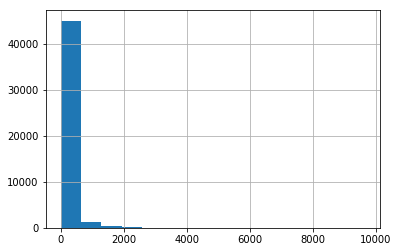

In [21]:
# Столбик Num_of_reviews

data['review_nan'] = pd.isna(data['Num_of_reviews']).astype('uint8')

column_stats(data, 'Num_of_reviews', num_bins=15)


In [22]:
# Вначале заполним этот столбик игнорируя выбросы

result = data[data.price_range_nan == 0].groupby(['City', 'price_range']).Num_of_reviews.median()

def fill_in_num_of_reviews(row):
    if pd.isnull(row['Num_of_reviews']):
        
        city = row['City']
        price = row['price_range']
    
        resultt = result[city][price]
        
        return resultt
    else:
        return row['Num_of_reviews']

data['number_of_reviews'] = data.apply(fill_in_num_of_reviews, axis = 1)

In [23]:
# Еще один способ заполнить столбик количество отзывов

def fill_in_num_of_reviews_v2(row):
    if pd.isnull(row['Num_of_reviews']):

        city = row['City']
        price = row['price_range']

        if row['Sample'] != 1:
            result = data[data.price_range_nan == 0].groupby(
                ['City', 'price_range']).Num_of_reviews.median()[city][price]
            return result

        else:

            rating = row['Rating']
            try:
                result = data[data.price_range_nan == 0].groupby(
                    ['City', 'Rating', 'price_range']).Num_of_reviews.median()[city][rating][price]
                if pd.isnull(result):
                    result = data[data.price_range_nan == 0].groupby(
                        ['City', 'price_range']).Num_of_reviews.median()[city][price]
                return result
            except:
                result = data[data.price_range_nan == 0].groupby(
                    ['City', 'price_range']).Num_of_reviews.median()[city][price]
                return result

    else:
        return row['Num_of_reviews']


data['number_of_reviews_v2'] = data.apply(fill_in_num_of_reviews_v2, axis=1)

In [24]:
# почистим количество ревью от выбрасов

perc_table = [[0]*3]*31

city_list = list(data.City.value_counts().index)

percentile = pd.DataFrame(perc_table)
percentile.index = city_list
percentile.columns = ['0.25', '0.5', '0.75']



for city in city_list:
    for value in [0.25,0.5,0.75]:    
        percentile[str(value)][city] = data[data.City == city].Num_of_reviews.quantile(value)
        
    
   

    

def del_outliers(row):
    if pd.notna(row['Num_of_reviews']):
        city = row['City']
        
        value = row['Num_of_reviews']
        perc25 = percentile['0.25'][city]
        perc75 = percentile['0.75'][city]
        perc50 = percentile['0.5'][city]



        low_bound = perc25 - 1.5 * (perc75 - perc25)
        top_bound = perc75 + 1.5 * (perc75 - perc25)

        if (value >= low_bound) & (value <= top_bound):
            return value
        elif value > top_bound:
            return top_bound

        else:
            return low_bound

    else:
        return row['Num_of_reviews']


data['Reviews_no_outliers'] = data.apply(del_outliers, axis = 1)



In [25]:
reviews_table = data.groupby(['City', 'price_range']).Num_of_reviews.median()

def fill_in_num_of_reviews(row):
    if pd.isnull(row['Reviews_no_outliers']):
        
        city = row['City']
        price = row['price_range']
    
        result = reviews_table[city][price]
        
        return result
    else:
        return row['Reviews_no_outliers']

data['Reviews_no_outliers'] = data.apply(fill_in_num_of_reviews, axis = 1)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
Restaurant_id           50000 non-null object
City                    50000 non-null object
Cuisine                 38410 non-null object
Ranking                 50000 non-null float64
Price                   32639 non-null object
Num_of_reviews          46800 non-null float64
Reviews                 49998 non-null object
Url                     50000 non-null object
Id_ta                   50000 non-null object
Sample                  50000 non-null int64
Rating                  50000 non-null float64
price_range_nan         50000 non-null uint8
price_range             50000 non-null object
price_range_v2          50000 non-null object
conv_price_range        50000 non-null int64
conv_price_range_V2     50000 non-null int64
review_nan              50000 non-null uint8
number_of_reviews       50000 non-null float64
number_of_reviews_v2    50000 non-null float64
Reviews_no_outlie

In [27]:
#serialized_data = serializeAndCompress(data)

In [28]:
#print(serialized_data)

In [29]:
#data = decompressAndDeserialize(serialized_data)

In [30]:
# Заполнение пропусков кухонь
data['cuisine_nan'] = pd.isna(data['Cuisine']).astype('uint8')
column_stats_nom(data, 'Cuisine')

['Italian']                                                                                                           1332
['French']                                                                                                            1019
['Spanish']                                                                                                            860
['French', 'European']                                                                                                 503
['Cafe']                                                                                                               500
                                                                                                                      ... 
['American', 'Bar', 'European', 'Spanish', 'Pub', 'Venezuelan', 'South American']                                        1
['Healthy', 'Mediterranean', 'European', 'Spanish', 'Vegetarian Friendly', 'Gluten Free Options', 'Vegan Options']       1
['Italian', 'Bar

count           38410
unique          10731
top       ['Italian']
freq             1332
Name: Cuisine, dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
Cuisine    38410 non-null object
dtypes: object(1)
memory usage: 390.8+ KB


None

In [31]:
# Эта функция создает словарь всех кухонь и создает списки кухонь для каждого ресторана
# с не пустым значениям.
all_cuisine = {}

def build_cuisine_dictionary(cuisine):
    if type(cuisine) == str and len(cuisine) > 5:
        cuisine = cuisine.lower()
        repl = ["'", "[", "]"]
        for char in repl:
            cuisine = cuisine.replace(char, '')
        
        sublist = cuisine.split(', ')
        
        for sub in sublist:
            if sub not in all_cuisine:
                all_cuisine[sub] = 1
            else:
                all_cuisine[sub] += 1
        
        return sublist
    
    else:
        return cuisine


data['cuisine_lists'] = data.Cuisine.apply(build_cuisine_dictionary)

In [32]:
# Эта функция заполняет некоторые недостающии пропуски кохонь из отызвов если там упоменались кухни


def fill_in_cuisines(row):
    if type(row['cuisine_lists']) != list or len(row['cuisine_lists']) == 0:
        
        sub_list = []
        
        if (type(row['Reviews']) == str and len(row['Reviews']) > 15):
        
            for word in all_cuisine:
                if word in row['Reviews'].lower():
                    if word != 'european' or ('eastern european' not in row['Reviews'] and 'western european' not in row['Reviews'] and 'south european' not in row['Reviews']):
                        sub_list.append(word)
            
                elif 'hot dog' in row['Reviews'] or 'burger' in row['Reviews'] or 'snack' in row['Reviews']:
                    sub_list.append('fast food')
    
            if len(sub_list) > 0:
                return sub_list
            
            else:
                return row['cuisine_lists']
    
        else:
            return row['cuisine_lists']
    
    
    else:
        return row['cuisine_lists']
    
    
    
data['cuisine_lists'] = data.apply(fill_in_cuisines, axis = 1)

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
Restaurant_id           50000 non-null object
City                    50000 non-null object
Cuisine                 38410 non-null object
Ranking                 50000 non-null float64
Price                   32639 non-null object
Num_of_reviews          46800 non-null float64
Reviews                 49998 non-null object
Url                     50000 non-null object
Id_ta                   50000 non-null object
Sample                  50000 non-null int64
Rating                  50000 non-null float64
price_range_nan         50000 non-null uint8
price_range             50000 non-null object
price_range_v2          50000 non-null object
conv_price_range        50000 non-null int64
conv_price_range_V2     50000 non-null int64
review_nan              50000 non-null uint8
number_of_reviews       50000 non-null float64
number_of_reviews_v2    50000 non-null float64
Reviews_no_outlie

In [33]:
# Эта функция просматривает дополнительные отзывы, которые я собрал с трипэдвайсера
# для заполнения кухонь

def check_more_feedbacks(row):
    if type(row['cuisine_lists']) != list or len(row['cuisine_lists']) == 0:
        link = row['Url']
        if row['Sample'] == 1:
            text = str(feeds[feeds.url == link].feedbacks.values)

        if row['Sample'] == 0:
            text = str(kaggle_rests[kaggle_rests.url == link].feedbacks.values)

        if len(text) >= 25:
            text = text.lower()
            sub_list = []
            for word in all_cuisine:
                if word in text:
                    sub_list.append(word)

            if 'hot dog' in text or 'burger' in text or 'snack' in text:
                sub_list.append('fast food')

            if len(sub_list) > 0:

                return sub_list

            else:
                return row['cuisine_lists']

        else:
            return row['cuisine_lists']

    else:
        return row['cuisine_lists']


data['cuisine_lists'] = data.apply(check_more_feedbacks, axis=1)

data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
Restaurant_id           50000 non-null object
City                    50000 non-null object
Cuisine                 38410 non-null object
Ranking                 50000 non-null float64
Price                   32639 non-null object
Num_of_reviews          46800 non-null float64
Reviews                 49998 non-null object
Url                     50000 non-null object
Id_ta                   50000 non-null object
Sample                  50000 non-null int64
Rating                  50000 non-null float64
price_range_nan         50000 non-null uint8
price_range             50000 non-null object
price_range_v2          50000 non-null object
conv_price_range        50000 non-null int64
conv_price_range_V2     50000 non-null int64
review_nan              50000 non-null uint8
number_of_reviews       50000 non-null float64
number_of_reviews_v2    50000 non-null float64
Reviews_no_outlie

In [34]:
'''rest_list = data[pd.notna(data.cuisine_lists)][data.price_range_nan == 0] 

def get_cuisines_from_rests(row):
    
    if type(row['cuisine_lists']) != list or len(row['cuisine_lists']) == 0:
        city = row['City']
        price = row['conv_price_range']
        ranking = row['Ranking']
        sub_part = rest_list[rest_list.City == city][rest_list.conv_price_range == price]
        
        idx = closest(sub_part.Ranking.values, ranking)
        
        result = sub_part.cuisine_lists.values[idx]
        
        return result
        
    else:
        return row['cuisine_lists']

    
data['cuisine_lists'] = data.apply(get_cuisines_from_rests, axis = 1)
'''

"rest_list = data[pd.notna(data.cuisine_lists)][data.price_range_nan == 0] \n\ndef get_cuisines_from_rests(row):\n    \n    if type(row['cuisine_lists']) != list or len(row['cuisine_lists']) == 0:\n        city = row['City']\n        price = row['conv_price_range']\n        ranking = row['Ranking']\n        sub_part = rest_list[rest_list.City == city][rest_list.conv_price_range == price]\n        \n        idx = closest(sub_part.Ranking.values, ranking)\n        \n        result = sub_part.cuisine_lists.values[idx]\n        \n        return result\n        \n    else:\n        return row['cuisine_lists']\n\n    \ndata['cuisine_lists'] = data.apply(get_cuisines_from_rests, axis = 1)\n"

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
Restaurant_id           50000 non-null object
City                    50000 non-null object
Cuisine                 38410 non-null object
Ranking                 50000 non-null float64
Price                   32639 non-null object
Num_of_reviews          46800 non-null float64
Reviews                 49998 non-null object
Url                     50000 non-null object
Id_ta                   50000 non-null object
Sample                  50000 non-null int64
Rating                  50000 non-null float64
price_range_nan         50000 non-null uint8
price_range             50000 non-null object
price_range_v2          50000 non-null object
conv_price_range        50000 non-null int64
conv_price_range_V2     50000 non-null int64
review_nan              50000 non-null uint8
number_of_reviews       50000 non-null float64
number_of_reviews_v2    50000 non-null float64
Reviews_no_outlie

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [36]:
# Перед тем как создать колонки по городам
# Создаю копию колонки всех городов
data['cities'] = data['City']

In [37]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

#### Возьмем следующий признак "Price Range".

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

### Обработать другие признаки вы должны самостоятельно!
Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!     
Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexe

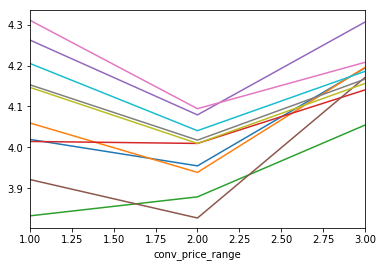

In [38]:
for city in data.cities.value_counts().index[:10]:

    data[data.Sample == 1][data.price_range_nan == 0].groupby(['cities', 'conv_price_range']).Rating.mean()[city].plot()

In [39]:
# В разных городах наблюдается снижение рэйтинга (во второй категории цен) в соотнешение между категорией цены и рейтингом.


In [40]:
# посмотрю если по разным городам какая-то корреляция проглядывается
for city in data.cities.value_counts().index[:6]:
    display(city)

    display(data[data.Sample == 1][data.price_range_nan == 0][data.cities == city][['conv_price_range', 'Rating']].corr())

'London'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,conv_price_range,Rating
conv_price_range,1.000000,0.006546
Rating,0.006546,1.000000


'Paris'

,conv_price_range,Rating
conv_price_range,1.000000,0.005141
Rating,0.005141,1.000000


'Madrid'

,conv_price_range,Rating
conv_price_range,1.000000,0.065306
Rating,0.065306,1.000000


'Barcelona'

,conv_price_range,Rating
conv_price_range,1.000000,0.020449
Rating,0.020449,1.000000


'Berlin'

,conv_price_range,Rating
conv_price_range,1.000000,-0.106162
Rating,-0.106162,1.000000


'Milan'

,conv_price_range,Rating
conv_price_range,1.000000,0.019092
Rating,0.019092,1.000000


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


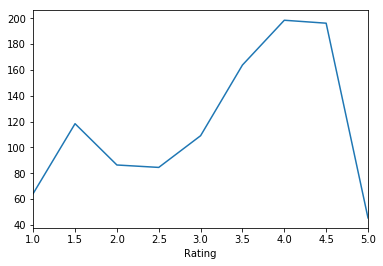

In [41]:


data[data.Sample == 1][data.price_range_nan == 0].groupby('Rating').number_of_reviews.mean().plot()



In [42]:
for city in data.cities.value_counts().index[:6]:
    display(city)
    display(data[data.Sample == 1][data.price_range_nan == 0][data.cities == city][['number_of_reviews', 'Rating']].corr())

'London'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,number_of_reviews,Rating
number_of_reviews,1.000000,0.037339
Rating,0.037339,1.000000


'Paris'

,number_of_reviews,Rating
number_of_reviews,1.000000,-0.012222
Rating,-0.012222,1.000000


'Madrid'

,number_of_reviews,Rating
number_of_reviews,1.000000,0.061428
Rating,0.061428,1.000000


'Barcelona'

,number_of_reviews,Rating
number_of_reviews,1.00000,0.03263
Rating,0.03263,1.00000


'Berlin'

,number_of_reviews,Rating
number_of_reviews,1.000000,-0.062676
Rating,-0.062676,1.000000


'Milan'

,number_of_reviews,Rating
number_of_reviews,1.000000,-0.005281
Rating,-0.005281,1.000000


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,conv_price_range,Ranking
conv_price_range,1.000000,-0.103883
Ranking,-0.103883,1.000000


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


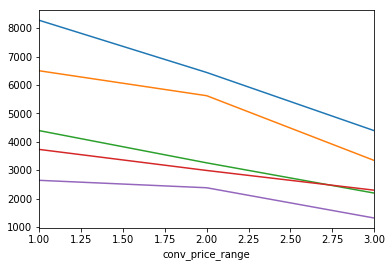

In [43]:
display(data[data.Sample == 1][data.price_range_nan == 0][['conv_price_range', 'Ranking']].corr())

for city in data.cities.value_counts().index[:5]:

    data[data.Sample == 1][data.price_range_nan == 0].groupby(['cities', 'conv_price_range']).Ranking.mean()[city].plot()

In [44]:
# посмотрю если по разным городам какая-то корреляция проглядывается между ценами и Рэнкингом

for city in data.cities.value_counts().index[:6]:
    display(city)

    display(data[data.Sample == 1][data.price_range_nan == 0][data.cities == city][['conv_price_range', 'Ranking']].corr())

'London'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,conv_price_range,Ranking
conv_price_range,1.000000,-0.210661
Ranking,-0.210661,1.000000


'Paris'

,conv_price_range,Ranking
conv_price_range,1.000000,-0.168427
Ranking,-0.168427,1.000000


'Madrid'

,conv_price_range,Ranking
conv_price_range,1.000000,-0.216915
Ranking,-0.216915,1.000000


'Barcelona'

,conv_price_range,Ranking
conv_price_range,1.000000,-0.171059
Ranking,-0.171059,1.000000


'Berlin'

,conv_price_range,Ranking
conv_price_range,1.000000,-0.123829
Ranking,-0.123829,1.000000


'Milan'

,conv_price_range,Ranking
conv_price_range,1.000000,-0.202275
Ranking,-0.202275,1.000000


In [45]:
# не большая корреляция проглядывается

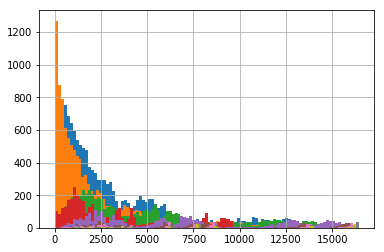

In [46]:
for x in (df_train['Rating'].value_counts()).index:
    df_train['Ranking'][df_train['Rating'] == x].hist(bins=100)
    
plt.show()

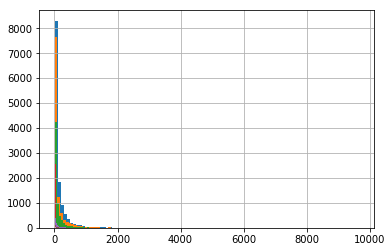

In [47]:
for x in (df_train['Rating'].value_counts()).index:
    df_train['Number of Reviews'][df_train['Rating'] == x].hist(bins=100)
    
plt.show()



In [48]:
# Эта программа составит таблицу как хит мэп.
# Эта таблица показывает средне статистический рэйтинг конкретной еды по городу
# Рэйтинги ресторанов с конкретной едой по городу дают среднее значение

heat = pd.DataFrame(index=sorted(list(data.cities.value_counts().index)))


def build_dframe_hmap():
    for cus in all_cuisine:
        sub_frame = data[data.Sample == 1][data.cuisine_lists.str.contains(
            cus, regex=False) == True]
        mean = sub_frame.groupby('cities')['Rating'].mean()

        for city in mean.index:

            if len(sub_frame[sub_frame['cities'] == city]) < 1:
                mean[city] = None

        if len(mean) != len(heat):
            paded_list = []
            cities = heat.index

            for city in cities:
                if city not in mean.index:
                    paded_list.append(None)
                else:
                    paded_list.append(mean[city])

            heat[cus] = paded_list
        else:
            heat[cus] = mean.values


build_dframe_hmap()
display(heat.info())

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, Amsterdam to Zurich
Columns: 125 entries, bar to latvian
dtypes: float64(125)
memory usage: 30.5+ KB


None

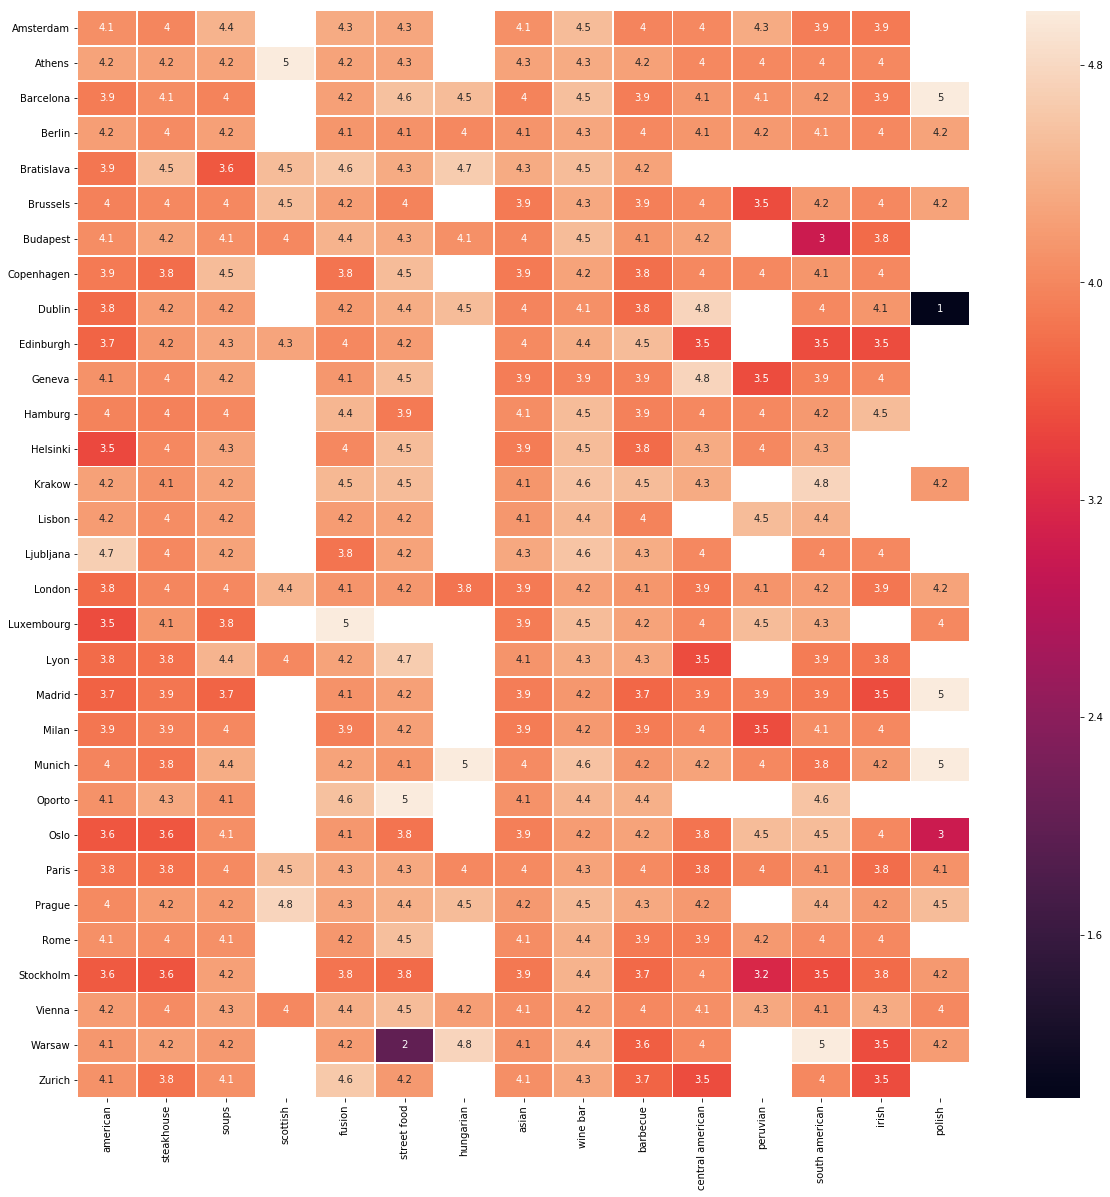

In [49]:
# Визуализация программы выше

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(heat.iloc[:, 30:45:], annot=True, linewidths=.8, ax=ax)

In [50]:
heat_length.head(31)

NameError: name 'heat_length' is not defined

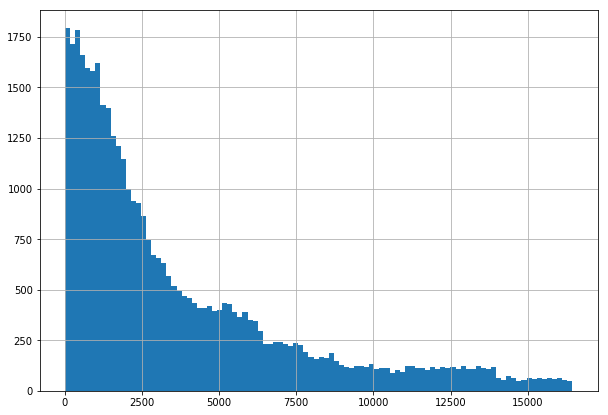

In [51]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

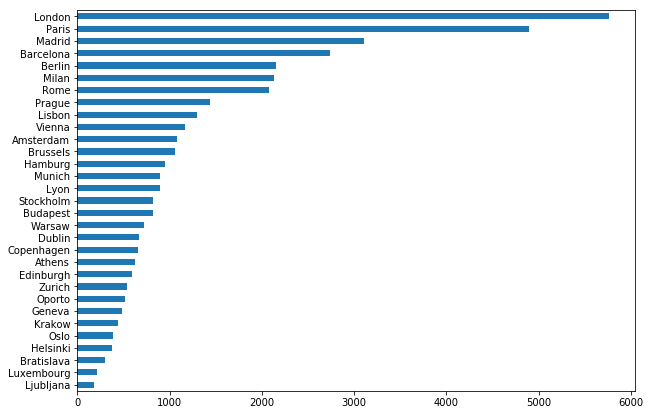

In [52]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

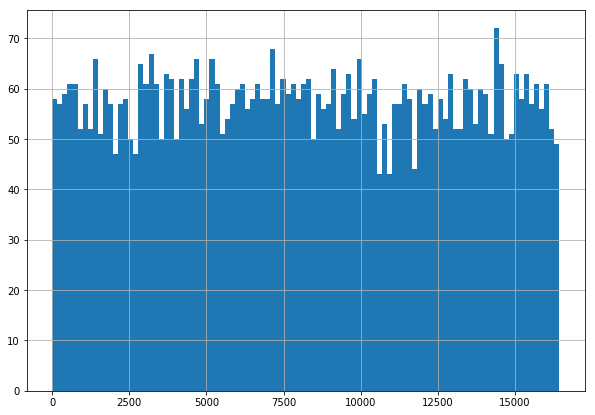

In [53]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

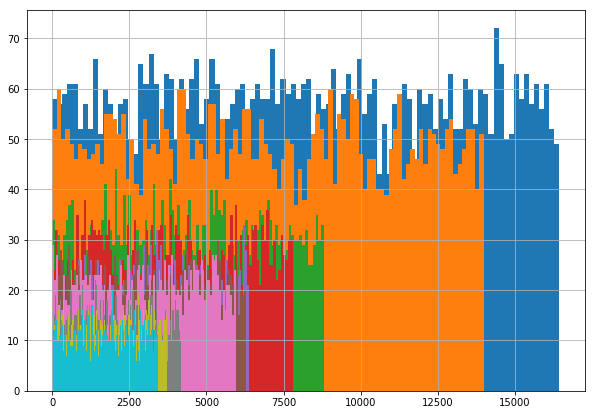

In [54]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

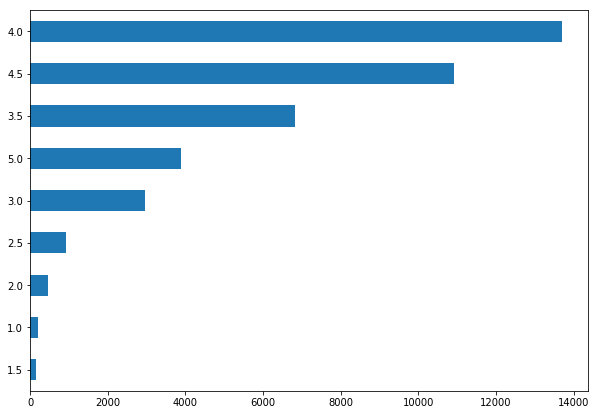

In [55]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

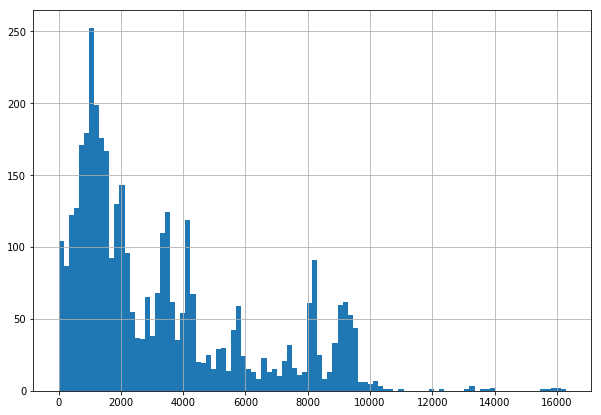

In [56]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

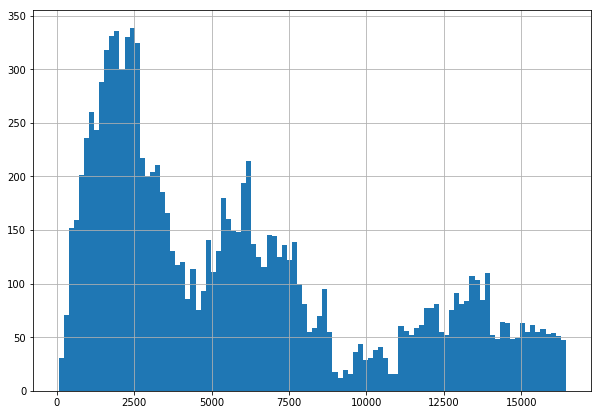

In [57]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

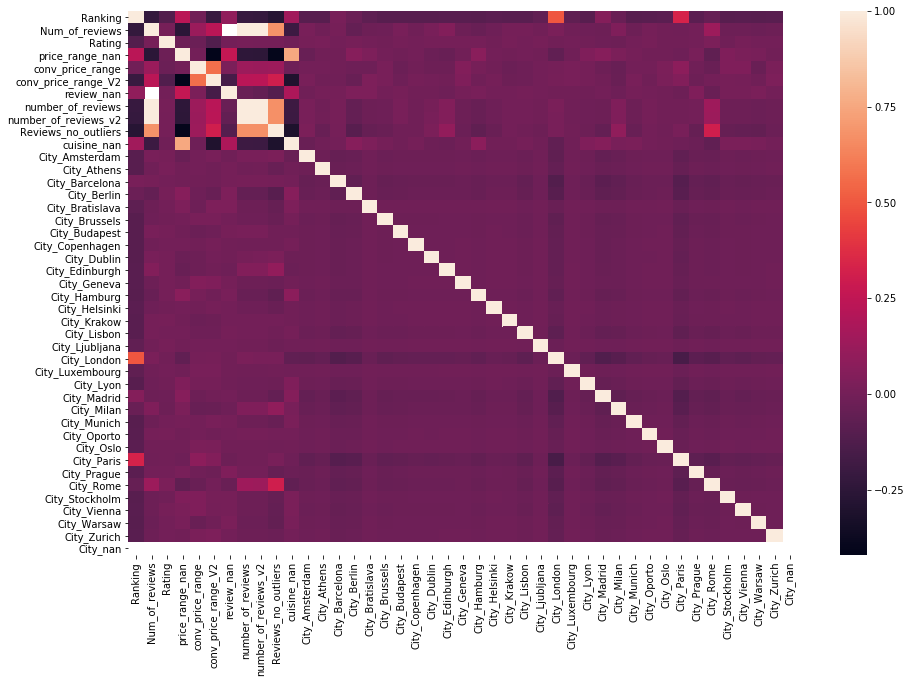

In [58]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['Sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Дополнительные Признаки

In [59]:
# График показывает что колонка Рэнкинг самая важная в моделе
# следовательно эта функция создает признак опираясь на Рэнкинг
# Значение Рэнкинг по каждому ресторану делится на максимальное значение
# в своем городе

cities_dic = {}
city_list = list(data.cities.value_counts().index)


for city in city_list:
    cities_dic[city] = data[data.cities == city].Ranking.max()


def standard_ranking(row):

    city = row['cities']

    return row['Ranking'] / cities_dic[city]


data['st_ranking'] = data.apply(standard_ranking, axis=1)

In [60]:
# Эта функция создает похожий признак на признак созданый выше,
# но делит на минимальное значения рэнкинга по каждому городу

cities_dict = {}
citi_list = list(data.cities.value_counts().index)


for city in citi_list:
    cities_dict[city] = data[data.cities == city].Ranking.min()


def standard_ranking_v2(row):

    city = row['cities']

    return cities_dict[city] / row['Ranking']


data['st_ranking_v2'] = data.apply(standard_ranking_v2, axis=1)





city_rate = [[0]*3]*31
city_list = list(data.cities.value_counts().index)
ratings = list( data[data.Sample == 1].Rating.value_counts().index)

rate_data = pd.DataFrame(city_rate)
rate_data.index = city_list
rate_data.columns = ratings

for city in city_list:
    for rate in ratings:
        rate_data[str(rate)][city] = data[data.cities == city][data.Rating == rate].Ranking.max()


def standard_ranking(row):
    
    city = row['cities']
    
    
    return row['Ranking'] / cities_dic[city]


data['st_ranking'] = data.apply(standard_ranking, axis = 1)



In [61]:
# Эта функция создает фальшивый рэйтинг для каждого ресторана
# опираясь на групировку по городам, ценам и рэйтингу из 26000 ресторанов
# по которым был известен price range

sort_table = data[data.Sample == 1].groupby(
    ['cities', 'conv_price_range', 'Rating']).st_ranking.median()


def fake_rating(row):
    price = row['conv_price_range']
    city = row['cities']
    ranking = row['st_ranking']
    range_list = sort_table[city][price].values
    ind = closest(range_list, ranking)

    result = sort_table[city][price].index[ind]

    return result


data['fake_rating'] = data.apply(fake_rating, axis=1)

In [62]:
data[data.Sample == 1][['Rating', 'fake_rating']].corr()

,Rating,fake_rating
Rating,1.00000,0.68813
fake_rating,0.68813,1.00000


In [63]:
# Эта функция создает признак определяю корреляция между рэнкингам
# и количеством отзывов по каждому городу и цене

price_table = [[0]*3]*31

city_list = list(data.cities.value_counts().index)

city_price = pd.DataFrame(price_table)
city_price.index = city_list
city_price.columns = ['1', '2', '3']


for city in city_list:
    for price in [1, 2, 3]:
        city_price.at[str(price), city] = data[data.conv_price_range == price][data.cities == city][[
            'Num_of_reviews', 'Ranking']].corr().values[0][1]
        print(city_price.at[str(price), city])


def find_correlations(row):
    price = row['conv_price_range']
    city = row['cities']
    result = city_price.at[str(price), city]
    return result


data['correlations'] = data.apply(find_correlations, axis=1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


-0.4084130962525263
-0.4619244049878702
-0.5082928109625532
-0.3192610204501702
-0.4473039322795599
-0.4414144844925481
-0.21426752516334602
-0.378474981310474
-0.5443617557274691
-0.45972752611682177
-0.3813955251761656
-0.5767679419565935
-0.41829466879967153
-0.4076513266342249
-0.5670591213046149
-0.3290776814960099
-0.4562753733435564
-0.6507515468551536
-0.45569867779933065
-0.4808875669658631
-0.6237864780335042
-0.3776649131038455
-0.3524752366487656
-0.5537957927649998
-0.42246528182708615
-0.43775556518339964
-0.6352638156183926
-0.4139108423198427
-0.34672882334912886
-0.649869536766436
-0.4807680919739053
-0.416111811042041
-0.7153679279962357
-0.3695956779012528
-0.32623874473186426
-0.6956619812214818
-0.4625413729194199
-0.4433289857075653
-0.5422900390138908
-0.420489750490579
-0.3242103407746745
-0.6099328420337213
-0.3392080207715628
-0.4322508302764262
-0.7342655035268829
-0.32001321118147436
-0.4380042537359295
-0.6554873766601372
-0.47488095247129514
-0.39150164491

In [64]:
# Признак создающиеся на основе самых важных признаков из графика

data['st_times_correlations'] = data['number_of_reviews'] * \
    data['st_ranking'] / (data['conv_price_range'] * data['correlations'])

In [65]:
# Нашел не большую статистику по средним ценам ресторанов
# в разных городах Европы и решил сделать признак

def det_country(city):
    if city in ['London', 'Edinburgh']:
        return 'England'
    elif city in ['Paris', 'Lyon']:
        return 'France'
    elif city in ['Madrid', 'Barcelona']:
        return 'Spain'
    elif city in ['Berlin', 'Hamburg', 'Munich']:
        return 'Germany'
    elif city in ['Rome', 'Milan']:
        return 'Italy'
    elif city == 'Prague':
        return 'Czechia'
    elif city in ['Lisbon', 'Oporto']:
        return 'Portugal'
    elif city == 'Vienna':
        return 'Austria'
    elif city == 'Amsterdam':
        return 'Netherlands'
    elif city == 'Brussels':
        return 'Belgium'
    elif city == 'Stockholm':
        return 'Sweden'
    elif city == 'Budapest':
        return 'Hungary'
    elif city in ['Warsaw', 'Krakow']:
        return 'Poland'
    elif city == 'Dublin':
        return 'Ireland'
    elif city == 'Copenhagen':
        return 'Denmark'

    elif city == 'Athens':
        return 'Greece'
    elif city in ['Geneva', 'Zurich']:
        return 'Switzerland'
    elif city == 'Oslo':
        return 'Norway'
    elif city == 'Helsinki':
        return 'Finland'
    elif city == 'Bratislava':
        return 'Slovakia'
    elif city == 'Luxembourg':
        return 'Luxembourg'
    elif city == 'Ljubljana':
        return 'Slovenia'


data['country'] = data.cities.apply(det_country)


prices = {'Switzerland': 28.12, 'Luxembourg': 28.12, 'Norway': 21.47, 'Denmark': 20.40,
          'Netherlands': 18.20, 'Italy': 18.20, 'Ireland': 18.20, 'Belgium': 18.20, 'England': 16.72,
          'France': 16.38, 'Austria': 15.57, 'Finland': 13.35, 'Spain': 12.74, 'Greece': 12.14,
          'Germany': 12.14, 'Sweden': 12.08, 'Slovenia': 10.32, 'Portugal': 9.70, 'Hungary': 6.79,
          'Poland': 6.76, 'Czechia': 6.62, 'Slovakia': 6.07}


def price_per_country(country):
    price = prices[country]

    return price


data['prices'] = data.country.apply(price_per_country)

In [66]:
# Признак создающиеся на основе самых важных признаков из графика
data['price_stranking_over_rev'] = - 1 * data['prices'] * \
    data['st_ranking'] / data['number_of_reviews']

In [67]:
# Признак основаный на Рэнкиге, который делит рэнкинг по каждому ресторану
# на среднюю величину рэнкинга сгруппированую по каждому городу и цене

rank_table = data.groupby(['cities', 'Price']).Ranking.mean()


def from_ranking_mean(row):
    city = row['cities']
    price = row['price_range']

    result = rank_table[city][price]
    result = row['Ranking'] / result

    return result


data['from_ranking_mean'] = data.apply(from_ranking_mean, axis=1)

In [68]:
strank_table = data.groupby(['cities', 'Price']).st_ranking.median()

def from_st_ranking_median(row):
    city = row['cities']
    price = row['price_range']
    
    result = strank_table[city][price]
    result = row['st_ranking'] / result
    
    return result

data['from_st_ranking_median'] = data.apply(from_st_ranking_median, axis = 1)

In [69]:
stranking_table = data.groupby(['cities', 'Price']).st_ranking.mean()

def from_st_ranking_mean(row):
    city = row['cities']
    price = row['price_range']
    
    result = stranking_table[city][price]
    result = row['st_ranking'] / result
    
    return result

data['from_st_ranking_mean'] = data.apply(from_st_ranking_mean, axis = 1)

In [70]:
# Признаки созданые на основе самых важных признаков из графика
data['stranking_over_ranking'] = data['Ranking'] / data['from_st_ranking_mean']
data['reviews_over_stranking_mean'] = data['number_of_reviews'] / \
    data['from_st_ranking_mean']
data['correlation_stranking_mean'] = data['from_st_ranking_mean'] ** 2 / \
    data['correlations']
data['reviews_st_over_range_correlations'] = data['number_of_reviews'] * \
    data['st_ranking'] / (data['conv_price_range'] * data['correlations'])

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 69 columns):
Restaurant_id                         50000 non-null object
Cuisine                               38410 non-null object
Ranking                               50000 non-null float64
Price                                 32639 non-null object
Num_of_reviews                        46800 non-null float64
Reviews                               49998 non-null object
Url                                   50000 non-null object
Id_ta                                 50000 non-null object
Sample                                50000 non-null int64
Rating                                50000 non-null float64
price_range_nan                       50000 non-null uint8
price_range                           50000 non-null object
price_range_v2                        50000 non-null object
conv_price_range                      50000 non-null int64
conv_price_range_V2                   50000 non-nul

In [72]:
# Эта функция создает признак соотншения по каждому городу между
# ресторанами по которым мы изначально знали цену и по которым мы не знали

ratio_table = data.groupby('cities').price_range_nan.value_counts()


def price_range_ratio(city):

    known = ratio_table[city][0]
    unknown = ratio_table[city][1]

    return known / unknown


data['price_known_ratio'] = data.cities.apply(price_range_ratio)

In [73]:
# Эта функция достает все даты из ревью и считает сколько дней между датами

import re
import datetime
from datetime import datetime, timedelta

from dateutil.relativedelta import relativedelta


list_date = []
max_dates = []


def collect_dates(review):
    if pd.notna(review):
        sub_list = []
        pattern = re.compile('\d\d\W\d\d\W\d\d\d\d')
        dates = pattern.findall(review)
        if len(dates) > 0:

            for date in dates:
                sep = date[2]
                if sep == '.':
                    date_form = datetime.strptime(
                        date, '%d' + sep + '%m' + sep + '%Y')
                else:
                    date_form = datetime.strptime(
                        date, '%m' + sep + '%d' + sep + '%Y')

                sub_list.append(date_form)

                list_date.append(date_form)

                if len(sub_list) > 1:
                    days = str(sub_list[0] - sub_list[1])
                    max_dates.append(days)

                    if 'None' in days:
                        return 0

                    else:
                        days = days.split(',')[0]
                        days = days.split(' ')[0]
                        if '0:' in days:
                            return 0
                        else:
                            return int(days)
    else:
        return 0


data['day_difference'] = data.Reviews.apply(collect_dates)

dat_list = np.array(list_date)
max_dates = np.array(max_dates)
display(data['day_difference'])

0           NaN
1          37.0
2          22.0
3          14.0
4          15.0
          ...  
49995      34.0
49996       9.0
49997    3127.0
49998      23.0
49999    1306.0
Name: day_difference, Length: 50000, dtype: float64

In [74]:
def fix_days_difference(days):    
    if pd.isnull(days):
        return 0
    else:
        return days
    
    
data['number_of_days'] = data.day_difference.apply(fix_days_difference)

In [75]:
# Признаки созданые на основе самых важных признаков из графика
data['days_times_reviews'] = data['number_of_days'] * data['number_of_reviews']
data['power'] = data['st_ranking'] ** data['fake_rating']
data['strank_times_reviews'] = data['st_ranking'] * data['number_of_reviews']

In [76]:
# Функция очищает дополнительно скаченые ревью ресторанов.

def clean_more_reviews(review):
    if pd.isnull(review):
        return review

    else:
        review = review.lower()
        chars = ['.', ',', ':', '!', '?']

        for char in chars:
            review = review.replace(char, '')

        return review


feeds['fixed_reviews'] = feeds.feedbacks.apply(clean_more_reviews)

In [77]:
def clean_more_reviews_test(review):
    if pd.isnull(review):
        return review

    else:
        review = review.lower()
        chars = ['.', ',', ':', '!', '?']

        for char in chars:
            review = review.replace(char, '')

        return review


kaggle_rests['fixed_reviews'] = kaggle_rests.feedbacks.apply(
    clean_more_reviews_test)

In [78]:
# Функция перемещает дополнительные ревью в data.

def transfer_feedbacks_train(link):
    feedback = str(feeds[feeds.url == link].fixed_reviews.values)
    # print(feedback)
    return feedback


data['more_reviews'] = data.Url.apply(transfer_feedbacks_train)

In [79]:
def transfer_feedbacks_test(row):
    if row['more_reviews'] != '[]':
        return row['more_reviews']

    else:

        link = row['Url']

        feedback = str(
            kaggle_rests[kaggle_rests.url == link].fixed_reviews.values)

        return feedback


data['more_reviews'] = data.apply(transfer_feedbacks_test, axis=1)

In [80]:
def combined_reviews(row):
    if type(row['Reviews']) == str:
        return row['Reviews'].lower() + ' ' + row['more_reviews']

    else:
        return row['more_reviews']


data['comb_reviews'] = data.apply(combined_reviews, axis=1)

In [81]:
# Эта функция используя негативные слова в отзовах сгруппировать рестораны

bad_words = 'miserable rubbish disaster rotten disgusting terrible horrible \
nightmare beware expansive overpriced boring no-go  yuck mislead mediocre \
slow uncomfortable unfriendly poor shame unpleasant unprofessional mouse mice fail \
dirt unsanitary rude garbage stingy disappoint hate crap nasty waste awful scam worst'

bad_w_list = bad_words.split()
bad_w_list.append("don't go")
bad_w_list.append('rip off')
bad_w_list.append('avoid this')
bad_w_list.append('oh my')
bad_w_list.append('run away')


def find_bad_words(review):

    review = review.lower()
    score = 0
    for word in bad_w_list:
        if word in review and 'not ' + word not in review:
            score += review.count(word)

    return -1 * score


data['bad_words'] = data.comb_reviews.apply(find_bad_words)

In [82]:
# Эта функция используя положительные слова в отзовах сгруппировать рестораны

good_words = 'superb incredible epic freshest yammy heaven spectacular masterpiece coolest favorite brilliant\
wonderful amazing delicious perfect charming excellent fabulous fantastic'


nice_word_list = good_words.split()
display(type(nice_word_list))
nice_word_list.append('hidden gem')
nice_word_list.append('must go')
nice_word_list.append('best food')
nice_word_list.append('best_meal')
nice_word_list.append('fine wine')
nice_word_list.append('highly recommend')
nice_word_list.append('great food')
nice_word_list.append('absolute gem')
nice_word_list.append('pleasant surprise')


def find_good_words(row):
    # if type(row['comb_reviews']) == str:
    review = row['comb_reviews']
    score = 0
    for word in nice_word_list:
        if word in review and 'not ' + word not in review:
            score += review.count(word)

    return score


data['good_words'] = data.apply(find_good_words, axis=1)

list

In [83]:
# Этот признак просто сумма оценки ресторанов по негативным и положительным отзовам.
data['total_score'] = data['good_words'] + data['bad_words']

In [84]:
# Используя выше таблицу хит, эта функция считает для каждого ресторана рэйтинг

def heat_rating(row):
    if type(row['cuisine_lists']) == list and len(row['cuisine_lists']) > 0:
        menu = row['cuisine_lists']
        city = row['cities']
        total_value = 0
        
        number = len(row['cuisine_lists'])
        sub_list = [] 
        for food in menu:
            value = heat[food][city]
            #length = heat_length[food][city]
            if pd.isnull(value):
                value = 0 
                number -= 1
            
            total_value += value
            
            
            
        if number == 0:
            return None
        
        

        else:
            

            return total_value / number

    else:
        return None


data['heat_rating'] = data.apply(heat_rating, axis=1)

In [85]:
heat_chart = data[data.price_range_nan == 0].groupby(
    ['cities', 'conv_price_range']).heat_rating.mean()


def fill_in_heatmap(row):
    if pd.isnull(row['heat_rating']):
        price = row['conv_price_range']
        city = row['cities']
        result = heat_chart[city][price]

        return result

    else:
        return row['heat_rating']


data['heat_rating'] = data.apply(fill_in_heatmap, axis=1)

In [86]:
# признак на основе хит рэйтинга и самых важных признаков в модели

data['heat_fake'] = (data['fake_rating'] ** data['heat_rating']) * data['st_ranking']

In [87]:
data[data.Sample == 1][pd.notna(data['heat_rating'])][['heat_rating', 'fake_rating', 'st_ranking', 'heat_fake', 'power', 'Rating']].corr()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,heat_rating,fake_rating,st_ranking,heat_fake,power,Rating
heat_rating,1.000000,0.235945,-0.214991,0.293228,-0.209050,0.325225
fake_rating,0.235945,1.000000,-0.739377,0.506622,-0.870507,0.688130
st_ranking,-0.214991,-0.739377,1.000000,0.114269,0.868235,-0.544663
heat_fake,0.293228,0.506622,0.114269,1.000000,-0.201176,0.329218
power,-0.209050,-0.870507,0.868235,-0.201176,1.000000,-0.690866
Rating,0.325225,0.688130,-0.544663,0.329218,-0.690866,1.000000


In [88]:
# Эта функция создает колонки с кухнями которые есть в ресторанах

def variety_cuisines_cities(menu):

    if type(menu) is list and len(menu) > 0:

        if cuisine in menu or cuisine == menu:
            return 1
        else:

            return 0

    else:
        return 0


for cuisine in all_cuisine:
    if all_cuisine[cuisine] >= 15:
        data[cuisine +
             '_kag'] = data.cuisine_lists.apply(variety_cuisines_cities)

In [89]:
# Эта функция строит словарь уникальных слов из ревью ресторанов

vocabulary = {}


def build_vacab(row):
    new_pattern = re.compile('[a-zA-Z]+')
    if pd.notna(row['Reviews']):
        review = row['Reviews']
        voc = new_pattern.findall(review)

        for word in voc:

            if word not in vocabulary:
                vocabulary[word] = 1
            else:
                vocabulary[word] += 1

        return voc


data['words_in_review'] = data.apply(build_vacab, axis=1)


display(len(vocabulary))

19540

In [90]:
# Функция собирает словарь самых часто встречаемых слов в отзывах

frequent_words = []


for key in vocabulary:
    if vocabulary[key] >= 19 and len(key) > 2:

        frequent_words.append(key)

print(len(frequent_words))


1378


In [91]:
# Эта функция создает столбики в data для самых встречаемых слов в отзывах

def build_columns_for_words(review):

    if type(review) != str or len(review) == 0:
        return 0

    return review.count(wordd)


vocab = []
for wordd in frequent_words:

    if wordd + '__vocab' not in data.columns:
        data[wordd + '__vocab'] = data.Reviews.apply(build_columns_for_words)


display(data.shape)

(50000, 1567)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [92]:
# на всякий случай, заново подгружаем данные
#df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
#df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
#df_train['Sample'] = 1 # помечаем где у нас трейн
#df_test['Sample'] = 0 # помечаем где у нас тест
#df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

#data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
#data.info()

In [93]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    df_output.drop(['Restaurant_id', 'Cuisine', 'Price', 'price_range', 'Reviews', 'Url', 'Id_ta', 'price_range_v2', 'Num_of_reviews', 'cuisine_lists', 'number_of_reviews_v2', 'conv_price_range_V2',  'country', 'from_st_ranking_median', 'from_st_ranking_mean', 'cities', 'day_difference', 'more_reviews', 'comb_reviews',  'words_in_review', 'fake_rating'], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    # df_output['Number of Reviews'].fillna(0, inplace=True)
    # тут ваш код по обработке NAN
    # ....
    
    
    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    # df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)
    # тут ваш код не Encoding фитчей
    # ....
    
    
    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    # ....
    
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    # object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    # df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

#### Запускаем и проверяем что получилось

In [94]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Ranking,Sample,Rating,price_range_nan,conv_price_range,review_nan,number_of_reviews,Reviews_no_outliers,cuisine_nan,City_Amsterdam,...,gourmet__vocab,Eats__vocab,flavour__vocab,filling__vocab,water__vocab,part__vocab,thing__vocab,Pizzas__vocab,bites__vocab,thin__vocab
22196,343.0,1,4.0,0,2,0,84.0,84.0,0,0,...,0,0,0,0,0,0,0,0,0,0
19091,3434.0,1,3.5,0,2,0,96.0,96.0,0,0,...,0,0,0,0,0,0,0,0,0,0
8012,4366.0,0,0.0,1,2,0,3.0,3.0,0,0,...,0,0,0,0,0,0,0,0,0,0
12062,3172.0,1,4.0,0,2,0,203.0,203.0,0,0,...,0,0,0,0,0,0,0,0,0,0
21990,2314.0,1,3.0,0,1,0,9.0,9.0,0,0,...,0,0,0,0,0,0,0,0,0,0
6971,1683.0,0,0.0,1,1,0,4.0,4.0,1,0,...,0,0,0,0,0,0,0,0,0,0
42838,100.0,1,4.5,0,2,0,1698.0,210.5,0,0,...,0,0,0,0,0,0,0,0,0,0
31418,510.0,1,4.0,0,1,0,20.0,20.0,0,0,...,0,0,0,0,0,0,0,0,0,0
17069,4107.0,1,4.0,0,1,0,62.0,62.0,0,0,...,0,0,0,0,0,0,0,0,0,0
40052,1591.0,1,3.5,1,1,0,16.0,16.0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 1546 entries, Ranking to thin__vocab
dtypes: float64(22), int64(1489), uint8(35)
memory usage: 578.1 MB


In [96]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('Sample == 1').drop(['Sample'], axis=1)
test_data = df_preproc.query('Sample == 0').drop(['Sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [97]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [98]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 1545), (40000, 1545), (40000, 1544), (32000, 1544), (8000, 1544))

# Model 
Сам ML

In [99]:
#X.corr()

In [100]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [101]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [102]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.9min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [103]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.193508125


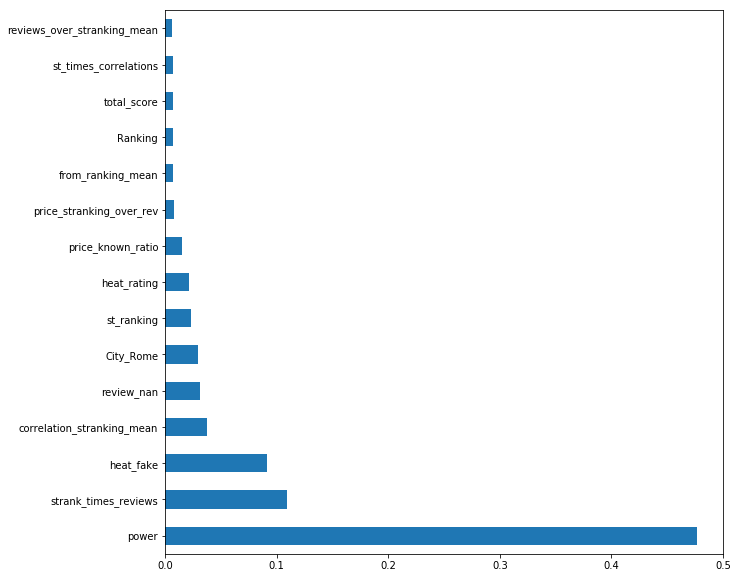

In [104]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [105]:
test_data.sample(10)

,Ranking,Rating,price_range_nan,conv_price_range,review_nan,number_of_reviews,Reviews_no_outliers,cuisine_nan,City_Amsterdam,City_Athens,...,gourmet__vocab,Eats__vocab,flavour__vocab,filling__vocab,water__vocab,part__vocab,thing__vocab,Pizzas__vocab,bites__vocab,thin__vocab
3348,3168.0,0.0,0,2,0,457.0,210.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
91,6878.0,0.0,1,1,0,12.0,12.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7034,1749.0,0.0,1,1,0,9.0,9.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4741,3987.0,0.0,1,3,0,6.0,6.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180,789.0,0.0,0,2,0,540.0,210.5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7470,13435.0,0.0,1,3,0,2.0,2.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4135,11512.0,0.0,0,2,0,14.0,14.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5883,2529.0,0.0,1,2,0,2.0,2.0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3867,1484.0,0.0,1,2,0,6.0,6.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5180,5277.0,0.0,0,2,0,165.0,165.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [106]:
test_data = test_data.drop(['Rating'], axis=1)

In [107]:
sample_submission.head(20)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
5,id_5,4.5
6,id_6,4.5
7,id_7,2.0
8,id_8,2.0
9,id_9,3.5


In [108]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [109]:
predict_submission

array([3.04 , 4.295, 4.38 , ..., 3.13 , 4.445, 4.425])

In [110]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.040
1,id_1,4.295
2,id_2,4.380
3,id_3,4.485
4,id_4,4.415
5,id_5,4.385
6,id_6,1.885
7,id_7,3.265
8,id_8,4.215
9,id_9,4.575


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
